In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import seaborn as sns
import warnings

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [2]:
train = pd.read_csv('train.csv',encoding = 'cp949')
info_competition = pd.read_csv('info_competition.csv',encoding = 'cp949') # 48개의 대회에 대한 정보
info_login = pd.read_csv('info_login.csv',encoding = 'cp949')
info_user =pd.read_csv('info_user.csv',encoding = 'cp949')
info_submission = pd.read_csv('info_submission.csv',encoding = 'cp949')
submission = pd.read_csv('submission.csv',encoding = 'cp949')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
train

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18
...,...,...,...,...,...
19003,2020-11-08 19:00:00,124,123,19,3128
19004,2020-11-08 20:00:00,166,159,29,4864
19005,2020-11-08 21:00:00,184,173,32,3426
19006,2020-11-08 22:00:00,163,155,34,2845


In [23]:
train['DateTime'] = pd.to_datetime(train['DateTime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  19008 non-null  datetime64[ns]
 1   사용자       19008 non-null  int64         
 2   세션        19008 non-null  int64         
 3   신규방문자     19008 non-null  int64         
 4   페이지뷰      19008 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 742.6 KB


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  19008 non-null  datetime64[ns]
 1   사용자       19008 non-null  int64         
 2   세션        19008 non-null  int64         
 3   신규방문자     19008 non-null  int64         
 4   페이지뷰      19008 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 742.6 KB


In [76]:
train['사용자'] = train['사용자'].astype(np.float)
train['세션'] = train['세션'].astype(np.float)
train['신규방문자'] = train['신규방문자'].astype(np.float)
train['페이지뷰'] = train['페이지뷰'].astype(np.float)

In [77]:
user = train.set_index('DateTime')[['사용자']]
session = train.set_index('DateTime')[['세션']]
new_visitor = train.set_index('DateTime')[['신규방문자']]
page_view = train.set_index('DateTime')[['페이지뷰']]
datas = [user, session, new_visitor, page_view]

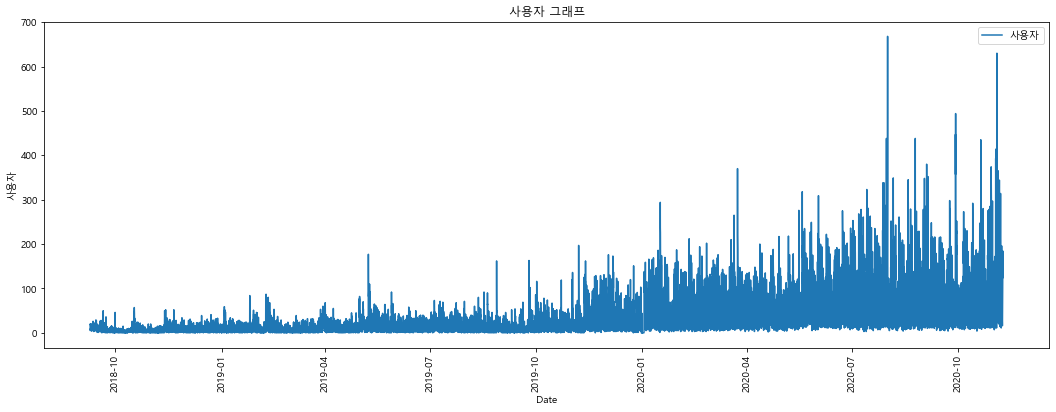

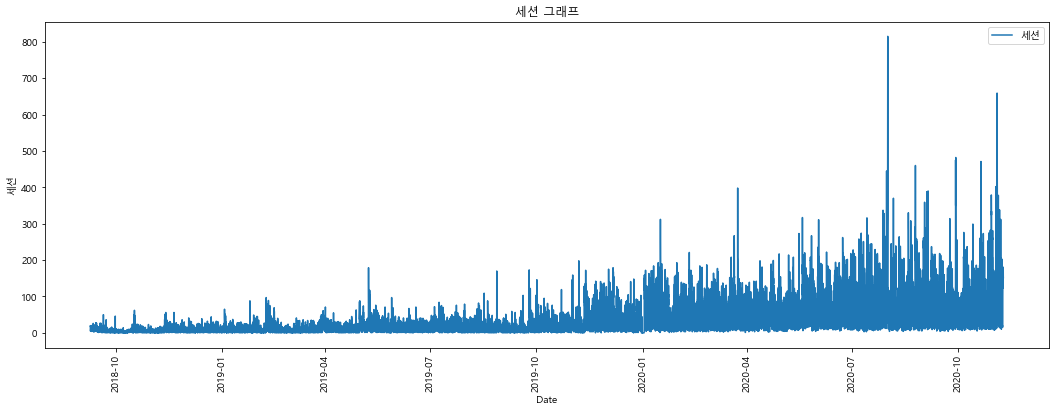

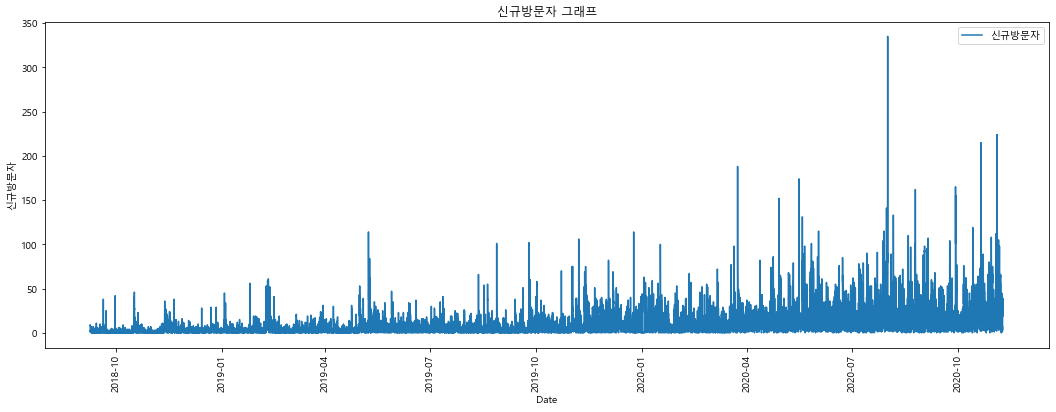

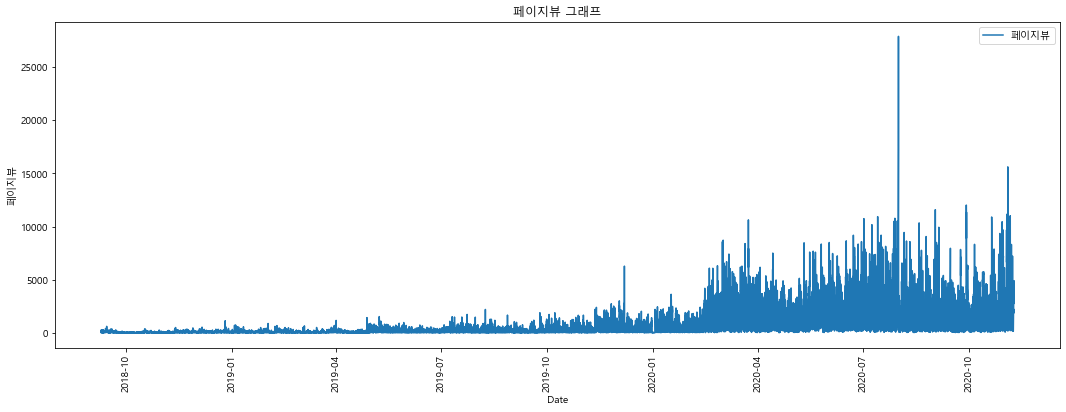

In [78]:
for data in datas:
    plt.figure(figsize=(18,6))
    plt.title(f'{data.columns.tolist()[0]} 그래프')
    plt.plot(data,label = f'{data.columns.tolist()[0]}')
    plt.xticks(rotation = 90)
    plt.xlabel('Date')
    plt.ylabel(f'{data.columns.tolist()[0]}')
    plt.legend(loc=0)
    plt.show()

In [96]:
user_train = user.loc[:'2020-09-07 23:00:00']
user_test = user.loc['2020-09-08 00:00:00':]

In [98]:
user_test

,사용자
DateTime,
2020-09-08 00:00:00,92.0
2020-09-08 01:00:00,50.0
2020-09-08 02:00:00,49.0
2020-09-08 03:00:00,26.0
2020-09-08 04:00:00,19.0
...,...
2020-11-08 19:00:00,124.0
2020-11-08 20:00:00,166.0
2020-11-08 21:00:00,184.0


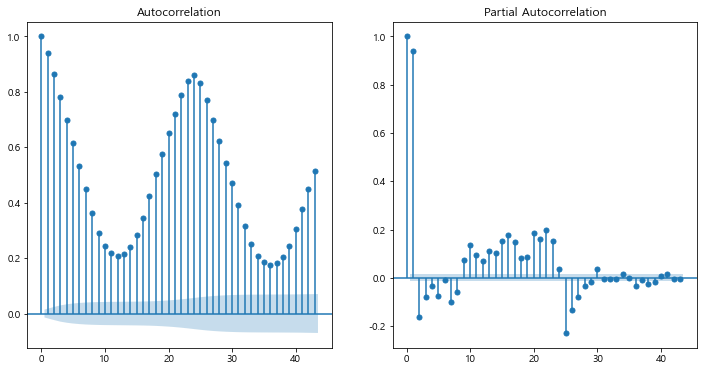

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,2,1)
plot_acf(user['사용자'],ax = ax1)

ax2 = plt.subplot(1,2,2)
plot_pacf(user['사용자'],ax = ax2)

plt.show()

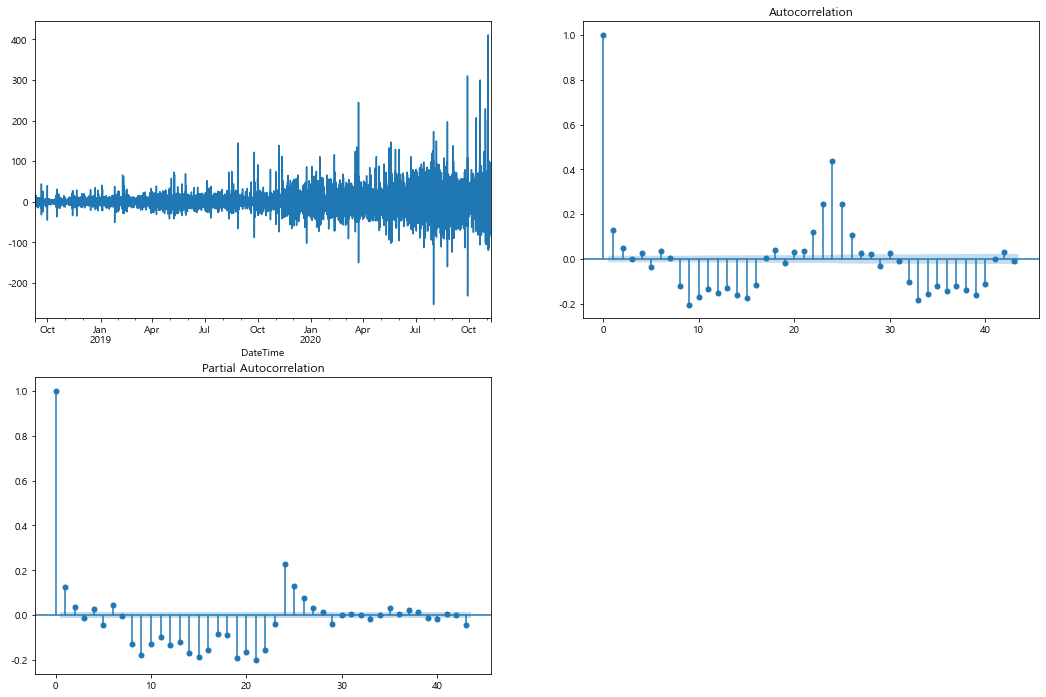

In [122]:
diff_1 = user['사용자'].diff(periods=1).iloc[1:]

plt.figure(figsize=(18,12))
ax1 = plt.subplot(2,2,1)
diff_1.plot(ax = ax1)

ax2 = plt.subplot(2,2,2)
plot_acf(diff_1, ax = ax2)

ax3 = plt.subplot(2,2,3)
plot_pacf(diff_1, ax = ax3)


plt.show()

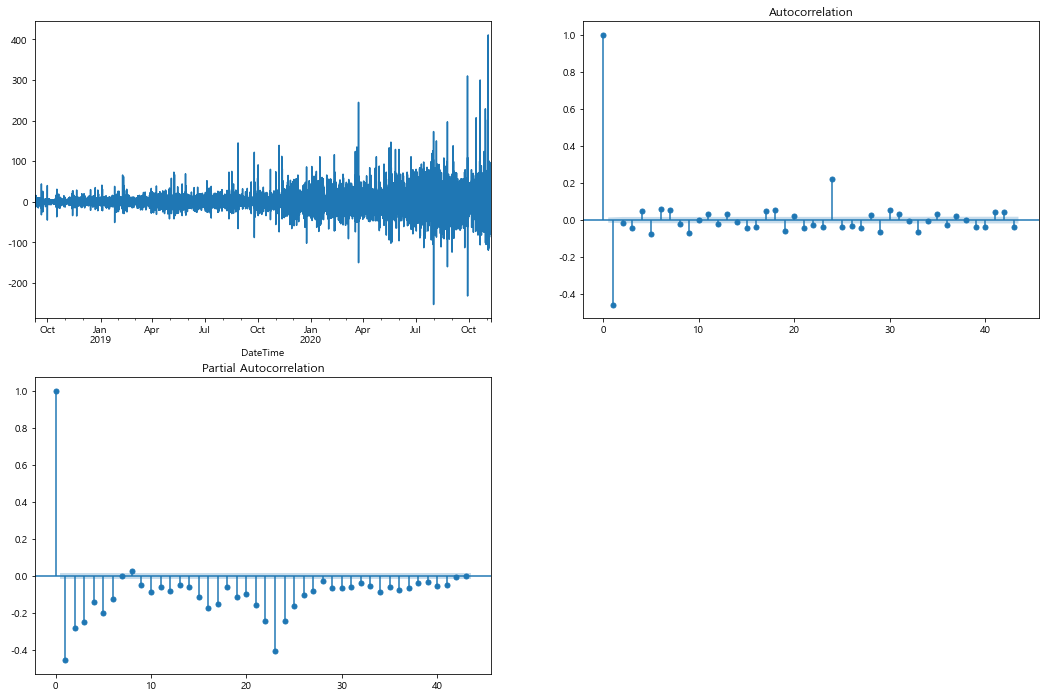

In [123]:
diff_2 = diff_1.diff(periods=1).iloc[1:]

plt.figure(figsize=(18,12))
ax1 = plt.subplot(2,2,1)
diff_1.plot(ax = ax1)

ax2 = plt.subplot(2,2,2)
plot_acf(diff_2, ax = ax2)

ax3 = plt.subplot(2,2,3)
plot_pacf(diff_2, ax = ax3)


plt.show()

In [148]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(user_train, order=(1,0,1))

model_fit = model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.wa

                              ARMA Model Results                              
Dep. Variable:                    사용자   No. Observations:                17520
Model:                     ARMA(1, 1)   Log Likelihood              -74311.650
Method:                       css-mle   S.D. of innovations             16.819
Date:                Sat, 02 Jan 2021   AIC                         148629.299
Time:                        17:15:37   BIC                         148652.613
Sample:                    09-09-2018   HQIC                        148636.976
                         - 09-07-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.사용자      0.9544      0.002    409.986      0.000       0.950       0.959
ma.L1.사용자      0.1405      0.007     19.329      0.000       0.126       0.155
                                    Roots           

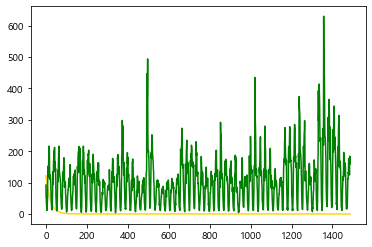

In [149]:
forecast_data = model_fit.forecast(steps=1488) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(user_test.사용자.values, color="green") # 실제 가격 그래프입니다.

In [144]:
pred_y

[127.92387881031655,
 126.07860058061375,
 124.43849798836851,
 122.98075764884106,
 121.68510278704578,
 120.53351119327954,
 119.50996453904516,
 118.60022556642198,
 117.79164005164782,
 117.07296078827915,
 116.43419114158272,
 115.86644599804242,
 115.3618281758265,
 114.91331857711803,
 114.51467855435729,
 114.16036313233667,
 113.84544387909101,
 113.56554035273805,
 113.31675917071327,
 113.09563985386835,
 112.89910669213953,
 112.72442596225008,
 112.5691679023568,
 112.43117291471802,
 112.30852152627149,
 112.1995076892817,
 112.10261505067601,
 112.01649585998231,
 111.93995222248353,
 111.87191943682504,
 111.81145118530607,
 111.75770637085563,
 111.70993741759914,
 111.66747987227957,
 111.62974316189188,
 111.59620237897178,
 111.56639098027445,
 111.53989429728381,
 111.51634376828535,
 111.49541181177203,
 111.47680726987387,
 111.46027135843052,
 111.44557406737336,
 111.43251096134749,
 111.42090033607109,
 111.4105806908778,
 111.40140848228609,
 111.393256127348